# Assignment8

## Ruofei Lai(RUL35)

## Ziyue Han(ZIH11)

## Shiqi Wang(SHW118)

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib.pyplot import clf 
from sklearn.svm import SVC
import seaborn as sns
import pandas as pd
import math
import numpy as np
from pandas.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import RFE

# Part1 iris

In [2]:
from sklearn import datasets
# Load data
iris = datasets.load_iris()

In [3]:
#iris = pd.DataFrame(data= np.c_[iris['data']], columns=iris['feature_names'])
#iris.head()
iris.data
iris.feature_names
iris.target
iris.target_names
x = pd.DataFrame(iris.data)
x.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
y = pd.DataFrame(iris.target)
y.columns = ['Targets']
x.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Text(0.5,1,'Petal')

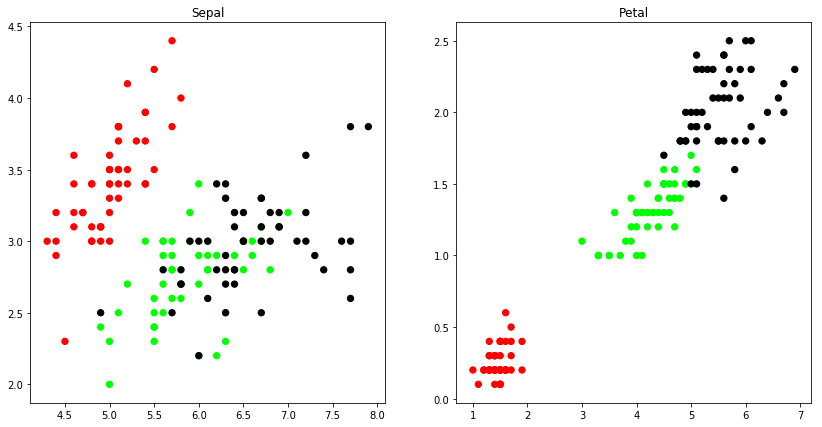

In [4]:
# Set the size of the plot
plt.figure(figsize=(14,7))
 
# Create a colormap
colormap = np.array(['red', 'lime', 'black'])
 
# Plot Sepal
plt.subplot(1, 2, 1)
plt.scatter(x.Sepal_Length, x.Sepal_Width, c=colormap[y.Targets], s=40)
plt.title('Sepal')
# Plot Petal 
plt.subplot(1, 2, 2)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Petal')

## use elbow method to determine the quantity of cluster

Text(0.5,0,'k')

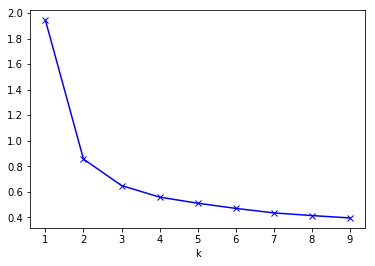

In [5]:
from sklearn.cluster import KMeans  
from scipy.spatial.distance import cdist  
K = range(1, 10)  
meandistortions = []  
for k in K:  
    kmeans = KMeans(n_clusters=k)  
    kmeans.fit(x)  
    meandistortions.append(sum(np.min(cdist(x, kmeans.cluster_centers_, 'euclidean'), axis=1)) / x.shape[0])  
plt.plot(K, meandistortions, 'bx-')  
plt.xlabel('k')  

we can see that after k=3, the slope become more gentle, so we choose k=3.

## k-means

In [6]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(x)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [7]:
print("Cluster memberships:\n{}".format(kmeans.labels_))

Cluster memberships:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


Text(0.5,1,'K Mean Classification')

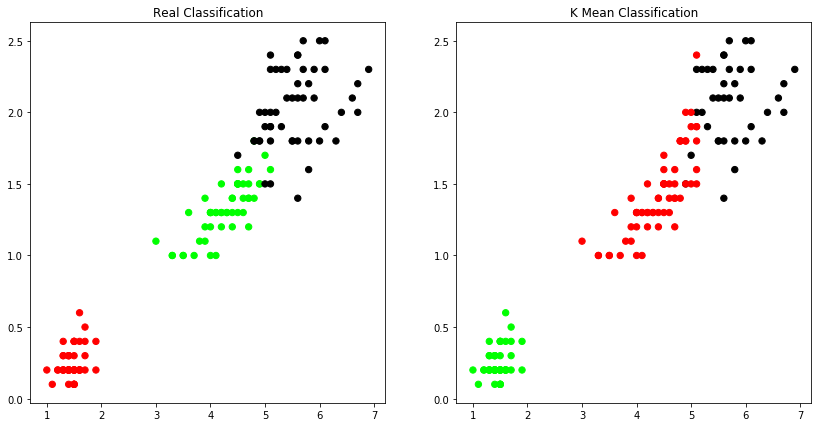

In [8]:
# View the results
# Set the size of the plot
plt.figure(figsize=(14,7))
 
# Create a colormap
colormap = np.array(['red', 'lime', 'black'])
 
# Plot the Original Classifications
plt.subplot(1, 2, 1)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Real Classification')
 
# Plot the Models Classifications
plt.subplot(1, 2, 2)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[kmeans.labels_], s=40)
plt.title('K Mean Classification')

In [9]:
# Change the color
predY = np.choose(kmeans.labels_, [1, 0, 2]).astype(np.int64)

Text(0.5,1,'K Mean Classification')

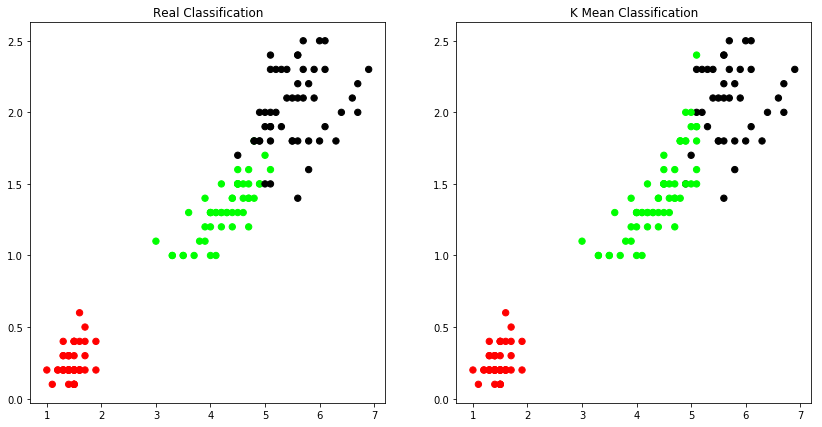

In [10]:
# View the results
# Set the size of the plot
plt.figure(figsize=(14,7))
 
# Create a colormap
colormap = np.array(['red', 'lime', 'black'])
 
# Plot Orginal
plt.subplot(1, 2, 1)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Real Classification')
 
# Plot Predicted with corrected values
plt.subplot(1, 2, 2)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[predY], s=40)
plt.title('K Mean Classification')

In [11]:
import sklearn.metrics as sm
sm.accuracy_score(y, predY)

0.8933333333333333

## Gaussian Mixture Model

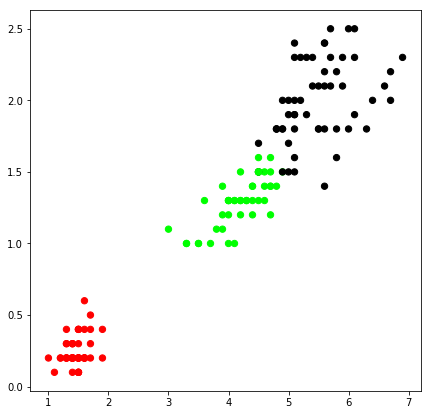

In [12]:
from sklearn.mixture import GaussianMixture
# Set the size of the plot
plt.figure(figsize=(7,7))
gmm = GaussianMixture(n_components=3).fit(x)
labels = gmm.predict(x)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[labels], s=40)

Text(0.5,1,'GMM Classification')

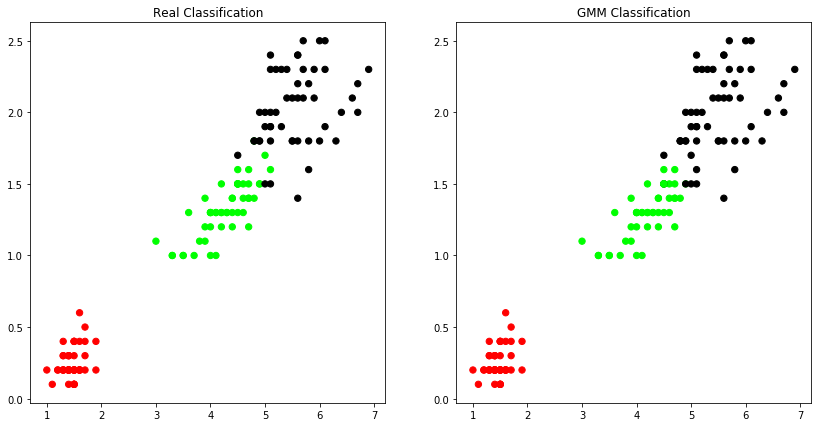

In [13]:
# Set the size of the plot
plt.figure(figsize=(14,7))
# Plot Orginal
plt.subplot(1, 2, 1)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Real Classification')
 
# Plot Predicted with corrected values
plt.subplot(1, 2, 2)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[labels], s=40)
plt.title('GMM Classification')

In [14]:
predY = np.choose(gmm.predict(x), [2, 0, 1]).astype(np.int64)

Text(0.5,1,'GMM Classification')

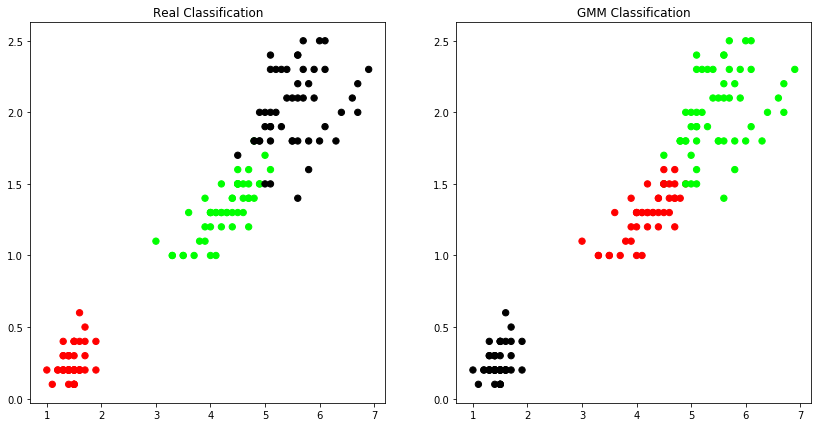

In [15]:
# Set the size of the plot
plt.figure(figsize=(14,7))
# Plot Orginal
plt.subplot(1, 2, 1)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Real Classification')
 
# Plot Predicted with corrected values
plt.subplot(1, 2, 2)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[predY], s=40)
plt.title('GMM Classification')

In [16]:
sm.accuracy_score(y, predY)

0.03333333333333333

## Hierarchical Clustering

In [17]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

import seaborn as sb



In [18]:
iris = datasets.load_iris()
iris.data
iris.feature_names
iris.target
iris.target_names
x = pd.DataFrame(iris.data)
x.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
y = pd.DataFrame(iris.target)
y.columns = ['Targets']
x.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [19]:
z = linkage(x,'ward')

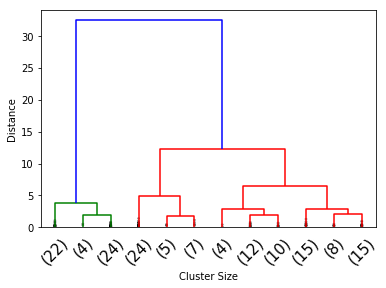

In [20]:
dendrogram(z, truncate_mode='lastp', p=12,leaf_rotation=45., leaf_font_size=15. ,show_contracted=True)
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()

In [21]:
k = 3

Hclustering = AgglomerativeClustering(n_clusters = k, affinity = 'euclidean', linkage='average')

Hclustering.fit(x)


AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='average', memory=None,
            n_clusters=3, pooling_func=<function mean at 0x10db7d730>)

In [22]:
sm.accuracy_score(y, Hclustering.labels_)

0.24

In [23]:
#change
predY = np.choose(Hclustering.labels_, [1, 0, 2]).astype(np.int64)

Text(0.5,1,'HC Classification')

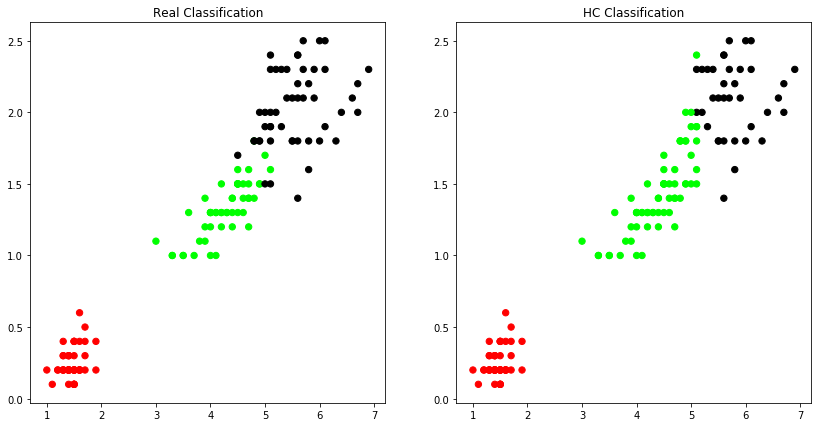

In [24]:
# Set the size of the plot
plt.figure(figsize=(14,7))
# Plot Orginal
plt.subplot(1, 2, 1)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Real Classification')
 
# Plot Predicted with corrected values
plt.subplot(1, 2, 2)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[predY], s=40)
plt.title('HC Classification')

In [25]:
sm.accuracy_score(y, predY)

0.9066666666666666

## Visualize data using PCA

In [27]:
# Load Data
iris = datasets.load_iris()
iris.data
iris.feature_names
iris.target
iris.target_names
x = pd.DataFrame(iris.data)
x.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
y = pd.DataFrame(iris.target)
y.columns = ['Targets']
print(x.head())
print(y.head())

   Sepal_Length  Sepal_Width  Petal_Length  Petal_Width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
   Targets
0        0
1        0
2        0
3        0
4        0


In [31]:
# Standardizing the features
from sklearn.preprocessing import StandardScaler
x = (StandardScaler().fit_transform(x))

In [33]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x)
pca.components_ 
pca.explained_variance_ratio_  

array([0.72770452, 0.23030523, 0.03683832, 0.00515193])

### Based on the above explained_variance_ratio, the number of n_components of PCA is 2.

In [38]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, y], axis = 1)
finalDf['Targets'].replace(0, 'Iris-setosa', inplace = True)
finalDf['Targets'].replace(1, 'Iris-versicolor', inplace = True)
finalDf['Targets'].replace(2, 'Iris-virginica', inplace = True)
print(finalDf)

     principal component 1  principal component 2         Targets
0                -2.264542               0.505704     Iris-setosa
1                -2.086426              -0.655405     Iris-setosa
2                -2.367950              -0.318477     Iris-setosa
3                -2.304197              -0.575368     Iris-setosa
4                -2.388777               0.674767     Iris-setosa
5                -2.070537               1.518549     Iris-setosa
6                -2.445711               0.074563     Iris-setosa
7                -2.233842               0.247614     Iris-setosa
8                -2.341958              -1.095146     Iris-setosa
9                -2.188676              -0.448629     Iris-setosa
10               -2.163487               1.070596     Iris-setosa
11               -2.327378               0.158587     Iris-setosa
12               -2.224083              -0.709118     Iris-setosa
13               -2.639716              -0.938282     Iris-setosa
14        

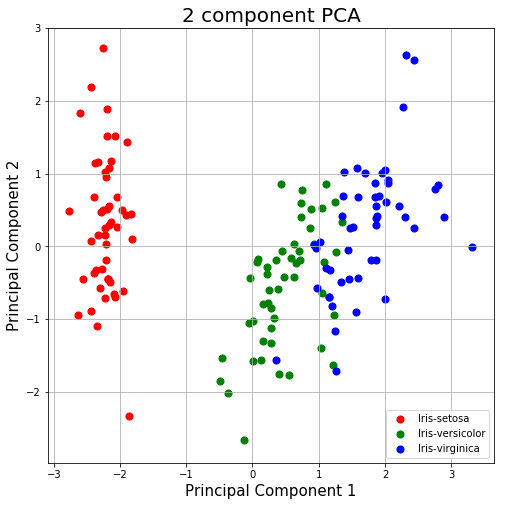

In [40]:
# Visualization
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Targets'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

## Visualize data using T-sne

In [48]:
from sklearn.manifold import TSNE
iris = load_iris()
X_tsne = TSNE(learning_rate=100).fit_transform(iris.data)

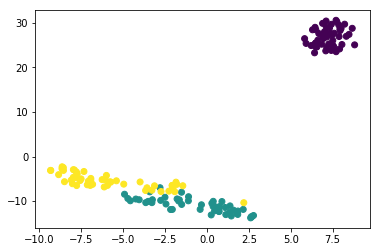

In [49]:
scatter(X_tsne[:, 0], X_tsne[:, 1], c=iris.target)

# Part2 Congressional Voting Records

In [3]:
DataHouseVotes = pd.read_csv('house-votes-84.csv')
DataHouseVotes.head()

,Party,handicapped_infants,water_project_cost_sharing,adoption_of_the_budget_resolution,physician_fee_freeze,el_salvador_aid,religious_groups_in_schools,nti_satellite_test_ban,aid_to_nicaraguan_contras,mx_missile,immigration,synfuels_corporation_cutback,education_spending,superfund_right_to_sue,crime,duty_free_exports,export_administration_act_sa
0,republican,n,y,n,y,y,y,n,n,n,y,w,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,w
2,democrat,w,y,y,w,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,w,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,w,y,y,y,y


In [71]:
DataHouseVotes.describe()

,Party,handicapped_infants,water_project_cost_sharing,adoption_of_the_budget_resolution,physician_fee_freeze,el_salvador_aid,religious_groups_in_schools,nti_satellite_test_ban,aid_to_nicaraguan_contras,mx_missile,immigration,synfuels_corporation_cutback,education_spending,superfund_right_to_sue,crime,duty_free_exports,export_administration_act_sa
count,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435
unique,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
top,democrat,n,y,y,n,y,y,y,y,y,y,n,n,y,y,n,y
freq,267,236,195,253,247,212,272,239,242,207,216,264,233,209,248,233,269


In [4]:
df=DataHouseVotes
df.replace('n',0, inplace=True)
df.replace('y',1, inplace=True)
df.replace('w', -1,inplace=True)
df.replace('republican', 1,inplace=True)
df.replace('democrat', 0,inplace=True)
x=df.iloc[:, range(1,17)] # dataframe get specify columns
y=df.iloc[:, 0]

In [212]:
df.head()

,Party,handicapped_infants,water_project_cost_sharing,adoption_of_the_budget_resolution,physician_fee_freeze,el_salvador_aid,religious_groups_in_schools,nti_satellite_test_ban,aid_to_nicaraguan_contras,mx_missile,immigration,synfuels_corporation_cutback,education_spending,superfund_right_to_sue,crime,duty_free_exports,export_administration_act_sa
0,1,0,1,0,1,1,1,0,0,0,1,-1,1,1,1,0,1
1,1,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,-1
2,0,-1,1,1,-1,1,1,0,0,0,0,1,0,1,1,0,0
3,0,0,1,1,0,-1,1,0,0,0,0,1,0,1,0,0,1
4,0,1,1,1,0,1,1,0,0,0,0,1,-1,1,1,1,1


## use elbow method to determine the quantity of cluster

Text(0.5,0,'k')

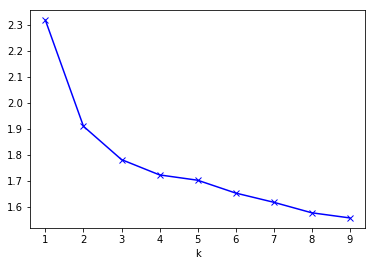

In [213]:
from sklearn.cluster import KMeans  
from scipy.spatial.distance import cdist  
K = range(1, 10)  
meandistortions = []  
for k in K:  
    kmeans = KMeans(n_clusters=k)  
    kmeans.fit(x)  
    meandistortions.append(sum(np.min(cdist(x, kmeans.cluster_centers_, 'euclidean'), axis=1)) / x.shape[0])  
plt.plot(K, meandistortions, 'bx-')  
plt.xlabel('k')  

we can see that after k=2, the slope become more gentle, so we choose k=2.

## k-means

In [226]:
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(x)
print("Cluster memberships:\n{}".format(kmeans.labels_))

Cluster memberships:
[1 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1
 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 0 0 0 0 0 1
 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1 0 1 1 0 1 1 0 1 1 0 0 1 1 0 0 0
 1 0 1 0 0 0 1 0 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 0 0 0 1 0
 1 0 1 1 0 0 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 1 1 1 0 0 0 0
 0 1 1 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 0 0 0 0 0 1
 1 0 0 0 1 0 1 1 1 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 1 0 0 1 0 0
 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 1 0 1 0 1 0 0 1 1 0 1 0 1 0 1 1 1 0 0 0 1
 0 0 1 1 1 1 0 1 1 1 0 0 1 0 1 1 0 0 1 0 1 0 1 1 0 0 0 1 0 1 1 1 0 1 1 1 1
 1 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 1 1]


In [227]:
predY = np.choose(kmeans.labels_, [0, 1]).astype(np.int64)

In [228]:
sm.accuracy_score(y, predY)

0.8689655172413793

## Gaussian Mixture Model

In [229]:
gmm = GaussianMixture(n_components=2).fit(x)

labels = gmm.predict(x)
print(labels)

[1 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1
 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 1 1 1 0 1 0 0 0 1 1 1 0 0 0 0 0 1
 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 0 1 1 1 1 1 0 0 1 0 0 0 0
 1 0 1 0 0 0 1 0 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 0 0 0 1 0
 1 0 1 1 0 0 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 1 1 1 0 0 0 1
 0 1 1 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 1 0 1 0 0 1 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 1
 1 0 0 0 1 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 0
 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 1 0 1 0 1 0 0 1 1 0 1 0 1 0 1 1 1 0 1 0 1
 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 1 1 1
 1 0 1 1 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 1]


In [234]:
predY = np.choose(labels, [0, 1]).astype(np.int64)

In [235]:
sm.accuracy_score(y, predY)

0.8528735632183908

## Hierarchical Clustering

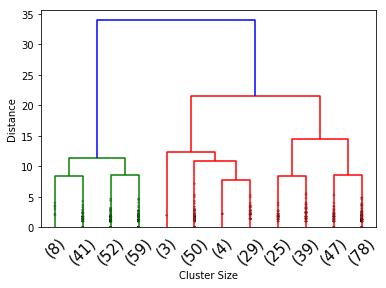

In [236]:
z = linkage(x,'ward')
dendrogram(z, truncate_mode='lastp', p=12,leaf_rotation=45., leaf_font_size=15. ,show_contracted=True)
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()

In [237]:
k = 2

Hclustering = AgglomerativeClustering(n_clusters = k, affinity = 'euclidean', linkage='average')

Hclustering.fit(x)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='average', memory=None,
            n_clusters=2, pooling_func=<function mean at 0x110d6e2f0>)

In [242]:
predY = np.choose(Hclustering.labels_, [1, 0]).astype(np.int64)

In [243]:
sm.accuracy_score(y, predY)

0.6114942528735632

## Visualize data using PCA

In [72]:
DataHouseVotes = pd.read_csv('house-votes-84.csv')
DataHouseVotes.head()
df=DataHouseVotes
df.replace('n',0, inplace=True)
df.replace('y',1, inplace=True)
df.replace('w', -1,inplace=True)
df.replace('republican', 1,inplace=True)
df.replace('democrat', 0,inplace=True)
x=df.iloc[:, range(1,17)] # dataframe get specify columns
y=df.iloc[:, 0]

In [73]:
pca = PCA()
pca.fit(x)
pca.components_ 
pca.explained_variance_ratio_ 

array([0.32262492, 0.14065724, 0.09464418, 0.06814847, 0.05264663,
       0.04554612, 0.04403347, 0.03947627, 0.03615354, 0.03019467,
       0.0284412 , 0.02611909, 0.02389071, 0.0200059 , 0.01499552,
       0.01242204])

### keep the columns with ratio more than 0.1

In [74]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, y], axis = 1)
print(finalDf)

     principal component 1  principal component 2  Party
0                 1.876092              -0.612674      1
1                 1.801577               1.290047      1
2                 0.718720               0.481490      0
3                -0.129424              -0.267527      0
4                 0.131407              -0.575555      0
5                 0.663528              -0.519593      0
6                 0.682107              -0.266718      0
7                 1.750130              -0.303179      1
8                 1.801159              -0.510982      1
9                -1.124299               1.463982      0
10                0.998464               0.759838      1
11                1.394306               1.483738      1
12               -0.659553               1.379802      0
13               -1.117909               1.214892      0
14                0.632494               1.821988      1
15                1.225093               1.354120      1
16               -0.340606     

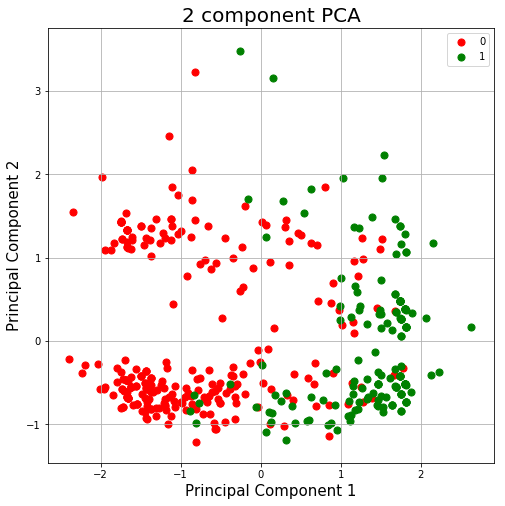

In [75]:
# Visualization
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Party'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

## Visualize data using T-sne

In [8]:
DataHouseVotes = pd.read_csv('house-votes-84.csv')
DataHouseVotes.head()
df=DataHouseVotes
df.replace('n',0, inplace=True)
df.replace('y',1, inplace=True)
df.replace('w', -1,inplace=True)
df.replace('republican', 1,inplace=True)
df.replace('democrat', 0,inplace=True)
x=df.iloc[:, range(1,17)] # dataframe get specify columns
y=df.iloc[:, 0]

from sklearn.manifold import TSNE
X_tsne = TSNE(learning_rate=100).fit_transform(x)

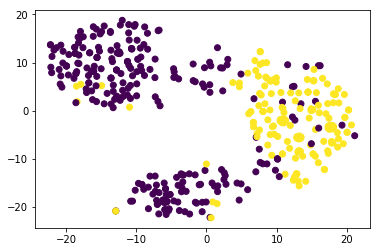

In [77]:
scatter(X_tsne[:, 0], X_tsne[:, 1], c=y)

In [5]:
import time

from sklearn.manifold import TSNE

n_sne = 3000

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 435 samples in 0.011s...
[t-SNE] Computed neighbors for 435 samples in 0.034s...
[t-SNE] Computed conditional probabilities for sample 435 / 435
[t-SNE] Mean sigma: 0.952265
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.917282
[t-SNE] Error after 300 iterations: 0.683858
t-SNE done! Time elapsed: 4.045835018157959 seconds


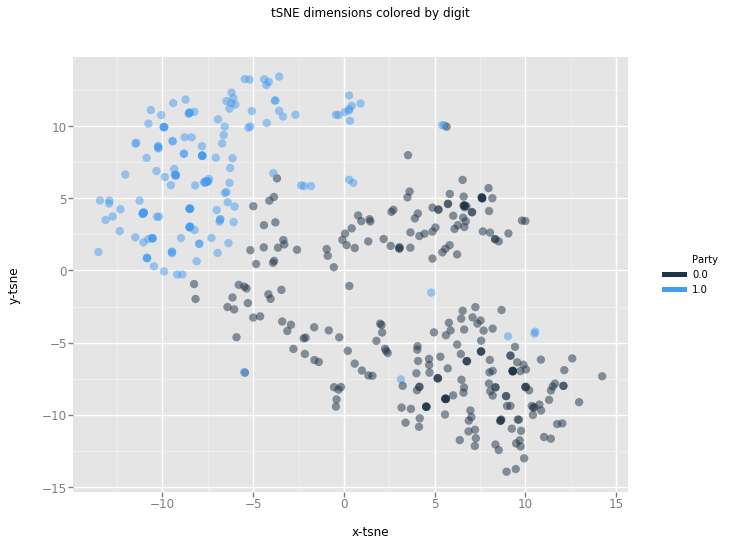

<ggplot: (6999810894)>

In [9]:
from ggplot import *
df_tsne = df.copy()
df_tsne['x-tsne'] = tsne_results[:,0]
df_tsne['y-tsne'] = tsne_results[:,1]

chart = ggplot( df_tsne, aes(x='x-tsne', y='y-tsne', color='Party') ) \
        + geom_point(size=70,alpha=0.5) \
        + ggtitle("tSNE dimensions colored by digit")
chart